In [1]:
#Dataset 1
!git clone https://github.com/mahedishato/Bangla-Sentiment-Analysis.git

Cloning into 'Bangla-Sentiment-Analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 3.15 MiB | 4.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [108]:
#Dataset 2
!git clone https://github.com/mohsinulkabir14/BanglaBook.git

fatal: destination path 'BanglaBook' already exists and is not an empty directory.


In [109]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, re
from sklearn.model_selection import train_test_split
import keras

In [110]:
from keras.preprocessing.text import Tokenizer

In [111]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````¬£|¬¢|√ë+-*/=EROero‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ012‚Äì34567‚Ä¢89‡•§!()-[]{};:'"‚Äú\‚Äô,<>./?@#$%^&*_~‚Äò‚Äî‡••‚Äù‚Ä∞‚öΩÔ∏è‚úåÔøΩÔø∞‡ß∑Ôø∞'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [112]:
df = pd.read_csv('/content/BanglaBook/data/csv/train.csv')
display(df)

id                                          Book_Name  \
0        19635                ‡¶®‡ßá‡¶≠‡¶æ‡¶∞ ‡¶∏‡ßç‡¶ü‡¶™ ‡¶≤‡¶æ‡¶∞‡ßç‡¶®‡¶ø‡¶Ç (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
1        31528   ‡¶∞‡¶æ‡¶∏‡ßÅ‡¶≤‡ßÅ‡¶≤‡ßç‡¶≤‡¶æ‡¶π (‡¶∏) ‡¶è‡¶∞ ‡¶®‡¶æ‡¶Æ‡¶æ‡¶Ø (‡ßß‡¶Æ ‡¶ì ‡ß®‡ßü ‡¶ñ‡¶£‡ßç‡¶° ‡¶è‡¶ï‡¶§‡ßç‡¶∞‡ßá...   
2         9235                  ‡¶™‡ßã‡ßü‡ßá‡¶ü‡¶ø‡¶ï ‡¶ú‡¶æ‡¶∏‡ßç‡¶ü‡¶ø‡¶∏ (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
3        89993       ‡¶ï‡¶Æ‡¶™‡ßç‡¶≤‡¶ø‡¶ü ‡¶è‡¶°‡ßã‡¶¨‡¶ø ‡¶´‡¶ü‡ßã‡¶∂‡¶™ (‡¶∏‡¶ø‡¶°‡¶ø ‡¶∏‡¶π) (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)     
4       155762                              ‡¶Æ‡¶æ‡¶ó‡¶´‡¶ø‡¶∞‡¶æ‡¶§‡ßá‡¶∞ ‡¶™‡¶• ‡¶ì ‡¶™‡¶æ‡¶•‡ßá‡ßü   
...        ...                                                ...   
110640  131529   ‡¶π‡ßÅ‡¶Æ‡¶æ‡ßü‡ßÇ‡¶® ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ : ‡¶∏‡¶æ‡¶π‡¶ø‡¶§‡ßç‡¶Ø‡ßá‡¶∞ ‡¶ú‡ßÄ‡¶¨‡¶®‡ßç‡¶§ ‡¶™‡¶æ‡¶†‡¶∂‡¶æ‡¶≤‡¶æ (‡¶π‡¶æ‡¶∞...   
110641  155466                                ‡¶ï‡¶ø‡¶Ç‡¶¨‡¶¶‡¶®‡ßç‡¶§‡¶ø‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶¨‡¶≤‡¶õ‡¶ø   
110642   96094   ‡¶Ü‡¶π‡¶ï‡¶æ‡¶Æ‡ßá ‡¶Ø‡¶ø‡¶®‡ßç‡¶¶‡ßá‡¶ó‡ßÄ (‡¶™‡¶û‡ßç‡¶ö‡¶Æ ‡¶∏‡¶Ç‡¶∏‡ßç‡¶ï‡¶∞‡¶£) (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
110643   11430              ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞ ‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏ ‡ßß.‡ß¶ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
110644  126679               ‡¶∏‡¶®‡ßç‡¶ß‡ßç‡¶Ø‡¶æ ‡¶®‡¶æ‡¶Æ‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∑‡¶£‡ßá (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                                        Writer_Name  \
0                                      ‡¶Ü‡ßü‡¶Æ‡¶æ‡¶® ‡¶∏‡¶æ‡¶¶‡¶ø‡¶ï    
1        ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶Æ‡¶æ ‡¶Æ‡ßÅ‡¶π‡¶æ‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶®‡¶æ‡¶∏‡ßÄ‡¶∞‡ßÅ‡¶¶‡ßç‡¶¶‡ßÄ‡¶® ‡¶Ü‡¶≤‡¶¨‡¶æ‡¶®‡ßÄ (‡¶∞‡¶π‡¶É)    
2                                   ‡¶Ü‡¶ó‡¶æ‡¶•‡¶æ ‡¶ï‡ßç‡¶∞‡¶ø‡¶∏‡ßç‡¶ü‡¶ø    
3                                     ‡¶¨‡¶æ‡¶™‡ßç‡¶™‡¶ø ‡¶Ü‡¶∂‡¶∞‡¶æ‡¶´    
4                       ‡¶á‡¶Æ‡¶æ‡¶Æ ‡¶á‡¶¨‡¶®‡ßÅ ‡¶∞‡¶ú‡¶¨ ‡¶π‡¶æ‡¶Æ‡ßç‡¶¨‡¶≤‡¶ø (‡¶∞‡¶π‡¶É)   
...                                             ...   
110640                     ‡¶∂‡¶æ‡¶Æ‡ßÄ‡¶Æ ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡ßß (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
110641                                ‡¶Ü‡¶π‡¶Æ‡¶æ‡¶¶ ‡¶∏‡¶æ‡¶¨‡ßç‡¶¨‡¶ø‡¶∞   
110642             ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßÅ‡¶π‡¶æ‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶π‡ßá‡¶Æ‡¶æ‡ßü‡ßá‡¶§ ‡¶â‡¶¶‡ßç‡¶¶‡ßÄ‡¶®    
110643                          ‡¶Ü‡¶®‡ßã‡ßü‡¶æ‡¶∞ ‡¶è‡¶Æ‡¶°‡¶ø ‡¶π‡ßã‡¶∏‡ßá‡¶á‡¶®    
110644                           ‡¶∞‡¶æ‡¶∏‡ßü‡¶æ‡¶§ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶ú‡¶ø‡¶ï‡ßã    

                                                 Category  Rating  \
0                                       ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶ú‡ßÄ‡¶¨‡¶® ‡¶â‡¶®‡ßç‡¶®‡ßü‡¶®        5   
1                                            ‡¶∏‡¶æ‡¶≤‡¶æ‡¶§/‡¶®‡¶æ‡¶Æ‡¶æ‡¶Ø        1   
2        ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...       5   
3                        ‡¶ó‡ßç‡¶∞‡¶æ‡¶´‡¶ø‡¶ï‡ßç‡¶∏ ‡¶°‡¶ø‡¶ú‡¶æ‡¶á‡¶® ‡¶ì ‡¶Æ‡¶æ‡¶≤‡ßç‡¶ü‡¶ø‡¶Æ‡¶ø‡¶°‡¶ø‡ßü‡¶æ        5   
4                                 ‡¶Ü‡¶§‡ßç‡¶Æ‡¶∂‡ßÅ‡¶¶‡ßç‡¶ß‡¶ø ‡¶ì ‡¶Ö‡¶®‡ßÅ‡¶™‡ßç‡¶∞‡ßá‡¶∞‡¶£‡¶æ       5   
...                                                   ...     ...   
110640                               ‡¶∏‡¶æ‡¶π‡¶ø‡¶§‡ßç‡¶Ø ‡¶ì ‡¶∏‡¶æ‡¶π‡¶ø‡¶§‡ßç‡¶Ø‡¶ø‡¶ï        5   
110641                                  ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ ‡¶¨‡ßç‡¶Ø‡¶ï‡ßç‡¶§‡¶ø‡¶§‡ßç‡¶¨       5   
110642                ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡¶ø ‡¶¨‡¶ø‡¶ß‡¶ø-‡¶¨‡¶ø‡¶ß‡¶æ‡¶® ‡¶ì ‡¶Æ‡¶æ‡¶∏‡¶Ü‡¶≤‡¶æ-‡¶Æ‡¶æ‡¶∏‡¶æ‡ßü‡ßá‡¶≤        5   
110643                                  ‡¶ï‡ßç‡¶Ø‡¶æ‡¶∞‡¶ø‡ßü‡¶æ‡¶∞ ‡¶â‡¶®‡ßç‡¶®‡ßü‡¶®        5   
110644                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   

                                                   Review      Site sentiment  \
0       ‡¶Æ‡ßã‡¶ü‡¶ø‡¶≠‡ßá‡¶∂‡¶®‡¶æ‡¶≤ ‡¶≠‡¶ø‡¶°‡¶ø‡¶ì ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶π‡ßü‡ßá‡¶õ‡ßá ‡¶≠‡¶æ‡¶á‡ßü‡¶æ‡¶∞ ‡¶≠‡¶ø‡¶°‡¶ø‡¶ì ...  Rokomari  positive   
1       ‡¶Ü‡¶∏‡¶∏‡¶æ‡¶≤‡¶æ‡¶Æ‡ßÅ ‡¶Ü‡¶≤‡¶æ‡¶á‡¶ï‡ßÅ‡¶Æ‡•§‡¶≠‡¶æ‡¶á‡ßü‡ßá‡¶∞‡¶æ, ‡¶¨‡¶á‡¶ü‡¶æ ‡¶®‡¶ø‡¶É‡¶∏‡¶®‡ßç‡¶¶‡ßá‡¶π‡ßá ‡¶Ö‡¶¨‡¶∂‡ßç...  Rokoma

In [113]:
df.shape

(110645, 9)

In [114]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110645 entries, 0 to 110644
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           110645 non-null  int64 
 1   Book_Name    110645 non-null  object
 2   Writer_Name  110456 non-null  object
 3   Category     110615 non-null  object
 4   Rating       110645 non-null  int64 
 5   Review       110645 non-null  object
 6   Site         110645 non-null  object
 7   sentiment    110645 non-null  object
 8   label        110645 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 7.6+ MB
None

DataFrame Shape:
(110645, 9)

DataFrame Size:
995805

DataFrame Descriptive Statistics:
                  id         Rating          label
count  110645.000000  110645.000000  110645.000000
mean    78939.435085       4.574902       1.834543
std     45620.275616       0.980055       0.510385
min         1.000000       1.000000       0.000000
25%   

In [115]:
df['label'].value_counts()

2    99110
0     6772
1     4763
Name: label, dtype: int64

In [116]:
df.reset_index(drop=True, inplace=True)
df['Review'] = df.Review.apply(lambda x: preprocessing(str(x)))

In [146]:
"""
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
"""

training_sentences = []
testing_sentences = []

train_sentences=df['Review'].values
train_labels=df['label'].values

for i in range(train_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)

training_sentences=np.array(training_sentences)

In [147]:
val_df = pd.read_csv('/content/BanglaBook/data/csv/validation.csv')

In [148]:
test_sentences=val_df['Review'].values
test_labels=val_df['label'].values
"""
for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)
"""
for i in range(test_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(test_sentences[i])
    testing_sentences.append(x)


testing_sentences=np.array(testing_sentences)

from sklearn.preprocessing import LabelEncoder

# Assuming train_labels and test_labels are arrays of string labels like 'positive', 'negative', etc.
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Now, you can use to_categorical
train_labels_one_hot = keras.utils.to_categorical(train_labels_encoded, num_classes = 3)
test_labels_one_hot = keras.utils.to_categorical(test_labels_encoded, num_classes = 3)


In [149]:
print("Training Set Length: "+str(len(df)))
print("Testing Set Length: "+str(len(val_df)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 110645
Testing Set Length: 15806
training_sentences shape: (110645,)
testing_sentences shape: (15806,)
train_labels shape: (110645,)
test_labels shape: (15806,)


In [150]:
training_sentences[3]

'‡¶¶‡ßÅ‡¶∞‡ßç‡¶¶‡¶æ‡¶®‡ßç‡¶§'

In [151]:
train_labels[3]

2

In [152]:
print(training_sentences.shape)
print(train_labels.shape)

print(testing_sentences.shape)
print(test_labels.shape)

(110645,)
(110645,)
(15806,)
(15806,)


In [153]:
vocab_size = 20000
embedding_dim = 300
max_length = 150
trunc_type='post'
oov_tok = ""

In [154]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

121498


In [155]:
from keras.preprocessing.sequence import pad_sequences

In [156]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

In [157]:
print("Sentence :--> \n")
print(training_sentences[3]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[3])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[3])

Sentence :--> 

‡¶¶‡ßÅ‡¶∞‡ßç‡¶¶‡¶æ‡¶®‡ßç‡¶§

Sentence Tokenized and Converted into Sequence :--> 

[40]

After Padding the Sequence with padding length 100 :--> 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 40]


In [158]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (110645, 150)
Padded shape(testing): (15806, 150)


In [159]:
test_df = pd.read_csv('/content/BanglaBook/data/csv/test.csv')
test_df.shape

(31614, 9)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder

# Assuming you have already processed your data and have vocab_size, embedding_dim, max_length, and train_labels

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Number of classes
num_classes = 3
"""
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))
"""
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(Dropout(0.2))
    # Change the output layer to have 3 neurons and use softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    # Use categorical_crossentropy as the loss function for multi-class classification
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 300)          6000000   
                                                                 
 conv1d_9 (Conv1D)           (None, 148, 128)          115328    
                                                                 
 bidirectional_18 (Bidirect  (None, 148, 256)          263168    
 ional)                                                          
                                                                 
 dropout_18 (Dropout)        (None, 148, 256)          0         
                                                                 
 bidirectional_19 (Bidirect  (None, 256)               394240    
 ional)                                                          
                                                                 
 dense_36 (Dense)            (None, 64)               

### **MODEL 2**

In [161]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Assuming you have processed testing_padded and test_labels as well

# One-hot encode labels
test_labels_encoded = label_encoder.transform(test_labels)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)

# Callback for early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Add these print statements for debugging
print("Training data shape:", padded.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing data shape:", testing_padded.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

# Check for any NaN or Inf values in your data
print("NaN or Inf values in padded:", np.any(np.isnan(padded)), np.any(np.isinf(padded)))
print("NaN or Inf values in train_labels_one_hot:", np.any(np.isnan(train_labels_one_hot)), np.any(np.isinf(train_labels_one_hot)))

history = model.fit(padded, train_labels_one_hot, epochs=100, batch_size=1024,
                    validation_data=(testing_padded, test_labels_one_hot),
                    use_multiprocessing=True, workers=8, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testing_padded, test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Training data shape: (110645, 150)
Training labels shape: (110645, 3)
Testing data shape: (15806, 150)
Testing labels shape: (15806, 3)
NaN or Inf values in padded: False False
NaN or Inf values in train_labels_one_hot: False False
Epoch 1/100
109/109 [==============================] - 50s 363ms/step - loss: 1.0739 - accuracy: 0.8795 - val_loss: 0.8220 - val_accuracy: 0.8958
Epoch 2/100
109/109 [==============================] - 37s 343ms/step - loss: 0.8135 - accuracy: 0.8957 - val_loss: 0.7690 - val_accuracy: 0.8958
Epoch 3/100
109/109 [==============================] - 36s 332ms/step - loss: 0.7581 - accuracy: 0.8957 - val_loss: 0.7215 - val_accuracy: 0.8958
Epoch 4/100
109/109 [==============================] - 37s 341ms/step - loss: 0.6733 - accuracy: 0.8960 - val_loss: 0.6108 - val_accuracy: 0.9004
Epoch 5/100
109/109 [==============================] - 36s 333ms/step - loss: 0.5622 - accuracy: 0.9086 - val_loss: 0.5566 - val_accuracy: 0.9067
Epoch 6/100
109/109 [=================

In [162]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


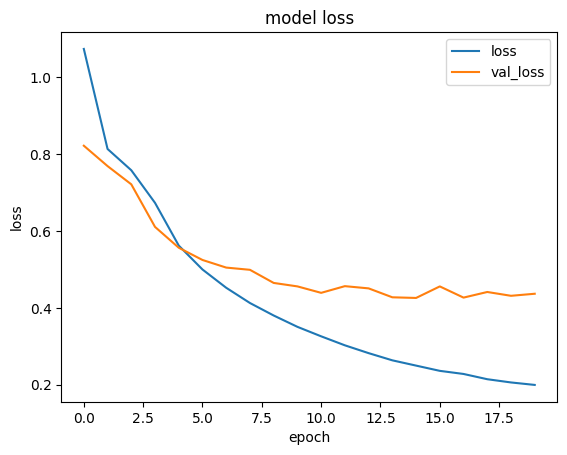

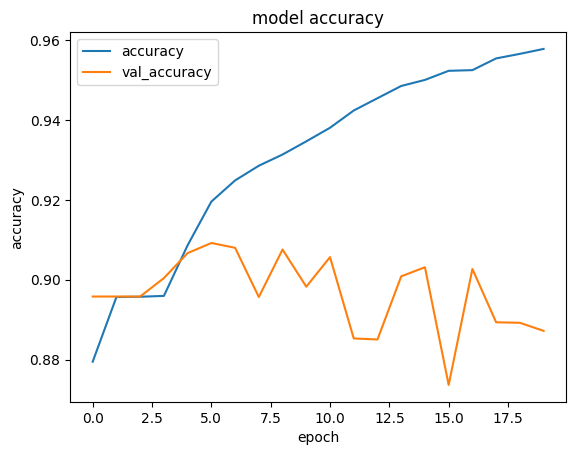

In [163]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [133]:
model.save_weights('model_weights_sentiment_81%.h5')

In [164]:
vocab_size = 20000
embedding_dim = 300
max_length = 300
trunc_type='post'
oov_tok = ""

In [172]:
def predict(text):
  #twt = [input()]
  twt = text
  #vectorizing the tweet by the pre-fitted tokenizer instance
  twt = tokenizer.texts_to_sequences(twt)
  #padding the tweet to have exactly the same shape as `embedding_2` input
  twt = pad_sequences(twt, maxlen=150, dtype='int32')
  #print(twt)

  sentiment = model.predict(twt)[0]
  return np.argmax(sentiment)
  """print(sentiment)
  if(np.argmax(sentiment) == 0):
      print("negative")
  elif (np.argmax(sentiment) == 1):
      print("neutral")
  elif (np.argmax(sentiment) == 2):
      print("positive")"""

In [166]:
text_list = ["‡¶∏‡ßÉ‡¶ú‡¶®‡¶∂‡ßÄ‡¶≤ ‡¶â‡¶¶‡ßç‡¶≠‡¶æ‡¶¨‡¶®‡ßÄ ‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶ó‡ßú‡¶§‡ßá ‡¶Ö‡¶¨‡¶¶‡¶æ‡¶® ‡¶∞‡¶æ‡¶ñ‡¶¨‡ßá: ‡¶®‡¶∏‡¶∞‡ßÅ‡¶≤ ‡¶π‡¶æ‡¶Æ‡¶ø‡¶¶",
             "‡¶¨‡¶ø‡¶∂‡ßç‡¶¨ ‡¶Æ‡¶æ‡¶®‡¶¨‡¶æ‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞ ‡¶¶‡¶ø‡¶¨‡¶∏ ‡¶Ü‡¶ú",
             "‡¶ì‡¶†‡¶æ‡¶®‡¶æ‡¶Æ‡¶æ ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶¨‡ßá ‡¶∏‡¶æ‡ßú‡ßá ‡¶ö‡¶æ‡¶∞ ‡¶≤‡¶æ‡¶ñ ‡¶ï‡¶®‡¶ü‡ßá‡¶á‡¶®‡¶æ‡¶∞, ‡¶¨‡¶æ‡ßú‡¶¨‡ßá ‡¶Ü‡¶Æ‡¶¶‡¶æ‡¶®‡¶ø-‡¶∞‡¶´‡¶§‡¶æ‡¶®‡¶ø",
             "‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¨‡ßá‡¶∂‡ßÄ ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶®‡¶¨‡¶æ‡ßü‡¶®‡¶Ø‡ßã‡¶ó‡ßç‡¶Ø ‡¶ú‡ßç‡¶¨‡¶æ‡¶≤‡¶æ‡¶®‡¶ø‡¶∞ ‡¶¨‡¶ø‡¶¶‡ßç‡¶Ø‡ßÅ‡¶§‡ßá ‡¶Ü‡¶ó‡ßç‡¶∞‡¶π ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞",
             "‡¶π‡ßá‡¶Æ‡¶®‡ßç‡¶§‡ßá‡¶∞ ‡¶∂‡ßá‡¶∑‡ßá ‡¶â‡¶§‡ßç‡¶§‡¶∞‡ßá ‡¶π‡¶ø‡¶Æ‡ßá‡¶≤ ‡¶π‡¶æ‡¶ì‡ßü‡¶æ",
             "‡¶∏‡¶æ‡ßú‡ßá ‡ßÆ ‡¶ò‡¶£‡ßç‡¶ü‡¶æ ‡¶™‡¶∞ ‡¶¶‡ßå‡¶≤‡¶§‡¶¶‡¶ø‡ßü‡¶æ-‡¶™‡¶æ‡¶ü‡ßÅ‡¶∞‡¶ø‡ßü‡¶æ ‡¶®‡ßå‡¶™‡¶•‡ßá ‡¶´‡ßá‡¶∞‡¶ø ‡¶ö‡¶≤‡¶æ‡¶ö‡¶≤ ‡¶∏‡ßç‡¶¨‡¶æ‡¶≠‡¶æ‡¶¨‡¶ø‡¶ï",
             "‚Äò‡¶Ü‡¶á‡¶ú ‡¶π‡¶†‡¶æ‡ßé ‡¶†‡¶æ‡¶®‡ßç‡¶°‡¶æ ‡¶¨‡¶æ‡ßú‡¶ø‡¶õ‡ßá, ‡¶¶‡ßá‡¶∞‡¶ø‡¶§ ‡¶ï‡¶æ‡¶Æ‡¶§ ‡¶¨‡ßá‡ßú‡¶æ‡¶á‡¶õ‡¶ø‚Äô",
             "‡¶≠‡¶æ‡¶∞‡ßç‡¶ö‡ßÅ‡ßü‡¶æ‡¶≤ ‡¶∏‡¶Æ‡ßç‡¶Æ‡ßá‡¶≤‡¶®‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶â‡ßé‡¶ñ‡¶æ‡¶§‡ßá‡¶∞ ‡¶™‡¶∞‡¶ø‡¶ï‡¶≤‡ßç‡¶™‡¶®‡¶æ ‡¶ú‡¶ô‡ßç‡¶ó‡¶ø‡¶¶‡ßá‡¶∞!",
             "‡¶¨‡ßç‡¶Ø‡¶æ‡¶∞‡¶ø‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶Æ‡¶á‡¶®‡ßÅ‡¶≤‡ßá‡¶∞ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ‡¶§‡ßá ‡¶∏‡ßÅ‡¶™‡ßç‡¶∞‡¶ø‡¶Æ ‡¶ï‡ßã‡¶∞‡ßç‡¶ü‡ßá‡¶∞ ‡¶¨‡¶ø‡¶ö‡¶æ‡¶∞‡¶ï‡¶æ‡¶ú ‡¶Ö‡¶∞‡ßç‡¶ß‡¶¨‡ßá‡¶≤‡¶æ ‡¶¨‡¶®‡ßç‡¶ß",
             "‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡¶ï‡ßá ‡¶ï‡¶æ‡¶Æ‡ßú‡ßá ‡¶™‡¶æ‡¶≤‡¶æ‡¶≤‡ßá‡¶æ ‡¶π‡¶§‡ßç‡¶Ø‡¶æ ‡¶Æ‡¶æ‡¶Æ‡¶≤‡¶æ‡¶∞ ‡¶Ü‡¶∏‡¶æ‡¶Æ‡¶ø",
             "‡¶ï‡ßÅ‡¶Ø‡¶º‡¶æ‡¶∂‡¶æ‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶£‡ßá ‡¶Æ‡¶æ‡¶ù‡¶®‡¶¶‡ßÄ‡¶§‡ßá ‡¶Ø‡¶æ‡¶§‡ßç‡¶∞‡ßÄ-‡¶Ø‡¶æ‡¶®‡¶¨‡¶æ‡¶π‡¶®‡¶∏‡¶π ‡¶Ü‡¶ü‡¶ï‡¶æ ‡ß´ ‡¶´‡ßá‡¶∞‡¶ø",
             "‡¶™‡¶æ‡¶ó‡¶≤‡¶æ ‡¶Æ‡¶∏‡¶ú‡¶ø‡¶¶‡ßá‡¶∞ ‡¶¶‡¶æ‡¶®‡¶¨‡¶æ‡¶ï‡ßç‡¶∏‡ßá ‡¶è‡¶¨‡¶æ‡¶∞ ‡¶™‡¶æ‡¶ì‡ßü‡¶æ ‡¶ó‡ßá‡¶≤‡ßã ‡ß¨ ‡¶ï‡ßã‡¶ü‡¶ø ‡ß©‡ß® ‡¶≤‡¶æ‡¶ñ ‡¶ü‡¶æ‡¶ï‡¶æ",
             "‡¶®‡¶ø‡¶∑‡ßá‡¶ß‡¶æ‡¶ú‡ßç‡¶û‡¶æ ‡¶Ü‡¶∞‡ßã‡¶™‡ßá‡¶∞ ‡¶Ø‡ßå‡¶ï‡ßç‡¶§‡¶ø‡¶ï ‡¶ï‡¶æ‡¶∞‡¶£ ‡¶¶‡ßá‡¶ñ‡¶õ‡¶ø ‡¶®‡¶æ: ‡¶ì‡¶¨‡¶æ‡ßü‡¶¶‡ßÅ‡¶≤ ‡¶ï‡¶æ‡¶¶‡ßá‡¶∞",
             "‡ß©‡ß® ‡¶¨‡ßà‡¶ß ‡¶™‡ßç‡¶∞‡¶æ‡¶∞‡ßç‡¶•‡ßÄ‡¶∞ ‡¶™‡ßç‡¶∞‡¶æ‡¶∞‡ßç‡¶•‡¶ø‡¶§‡¶æ ‡¶¨‡¶æ‡¶§‡¶ø‡¶≤ ‡¶ö‡ßá‡ßü‡ßá ‡¶Ü‡¶™‡¶ø‡¶≤",
             "‡¶¶‡ßá‡ßú ‡¶Æ‡¶æ‡¶∏ ‡¶™‡¶∞ ‡¶ú‡ßú‡ßã ‡¶π‡¶§‡ßá ‡¶Ø‡¶æ‡¶ö‡ßç‡¶õ‡ßá‡¶® ‡¶¨‡¶ø‡¶è‡¶®‡¶™‡¶ø‡¶∞ ‡¶®‡ßá‡¶§‡¶æ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶∞‡¶æ",
             "‡¶∂‡ßÅ‡¶ï‡ßç‡¶∞‡¶¨‡¶æ‡¶∞ ‡¶™‡ßç‡¶∞‡¶æ‡¶•‡¶Æ‡¶ø‡¶ï‡ßá‡¶∞ ‡¶∏‡¶π‡¶ï‡¶æ‡¶∞‡ßÄ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶ï ‡¶®‡¶ø‡ßü‡ßã‡¶ó ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ",
             "‡¶¨‡¶ø‡¶è‡¶®‡¶™‡¶ø ‡¶Ü‡¶Æ‡¶≤‡ßá‡¶∞ ‡¶ö‡ßá‡ßü‡ßá ‡¶Ö‡¶∞‡ßç‡¶ß‡ßá‡¶ï‡ßá ‡¶®‡ßá‡¶Æ‡ßá‡¶õ‡ßá ‡¶Æ‡¶æ‡¶§‡ßÉ ‡¶ì ‡¶∂‡¶ø‡¶∂‡ßÅ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ‡¶π‡¶æ‡¶∞: ‡¶∏‡ßç‡¶¨‡¶æ‡¶∏‡ßç‡¶•‡ßç‡¶Ø‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ",
             "‡¶∏‡ßç‡¶¨‡¶æ‡¶∏‡ßç‡¶•‡ßç‡¶Ø‡ßá‡¶∞ ‡¶∏‡¶æ‡¶¨‡ßá‡¶ï ‡¶°‡¶ø‡¶ú‡¶ø ‡¶ï‡¶æ‡¶≤‡¶æ‡¶Æ‡¶∏‡¶π ‡ß¨ ‡¶ú‡¶®‡ßá‡¶∞ ‡¶¨‡¶ø‡¶∞‡ßÅ‡¶¶‡ßç‡¶ß‡ßá ‡¶∏‡¶æ‡¶ï‡ßç‡¶∑‡ßç‡¶Ø ‡ßß‡ß¨ ‡¶ú‡¶æ‡¶®‡ßÅ‡ßü‡¶æ‡¶∞‡¶ø",
             "‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ ‡¶ú‡ßã‡¶∞ ‡¶ï‡¶∞‡ßá ‡¶ö‡¶æ‡¶™‡¶ø‡ßü‡ßá ‡¶¶‡ßá‡¶ì‡ßü‡¶æ ‡¶®‡¶æ ‡¶π‡¶≤‡ßá‡¶á ‡¶∏‡ßÉ‡¶ú‡¶®‡¶∂‡ßÄ‡¶≤‡¶§‡¶æ ‡¶§‡ßà‡¶∞‡¶ø ‡¶π‡¶¨‡ßá: ‡¶Ö‡¶ß‡ßç‡¶Ø‡¶æ‡¶™‡¶ï ‡¶Æ‡¶∂‡¶ø‡¶â‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶®",
             "‡¶è‡¶≤‡¶∏‡¶ø‡¶§‡ßá ‡¶¨‡¶ø‡¶¶‡ßá‡¶∂‡¶ø ‡¶ï‡ßç‡¶∞‡ßá‡¶§‡¶æ‡¶∞ ‡¶∂‡¶∞‡ßç‡¶§: ‡¶Ø‡¶æ ‡¶¨‡¶≤‡¶õ‡ßá ‡¶¨‡¶ø‡¶ú‡¶ø‡¶è‡¶Æ‡¶á‡¶è",
             "‡¶ì‡ßü‡¶æ‡¶∂‡¶ø‡¶Ç‡¶ü‡¶® ‡¶ì ‡¶¢‡¶æ‡¶ï‡¶æ‡¶∞ ‡¶∏‡¶Æ‡ßç‡¶™‡¶∞‡ßç‡¶ï‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶∂‡¶ï‡ßç‡¶§‡¶ø‡¶∂‡¶æ‡¶≤‡ßÄ ‡¶∂‡ßç‡¶∞‡¶Æ ‡¶Ü‡¶á‡¶® ‡¶ó‡ßÅ‡¶∞‡ßÅ‡¶§‡ßç‡¶¨‡¶™‡ßÇ‡¶∞‡ßç‡¶£: ‡¶™‡¶ø‡¶ü‡¶æ‡¶∞ ‡¶π‡¶æ‡¶∏",
             "‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡ßá ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶â‡¶®‡ßç‡¶®‡¶§‡¶ø ‡¶ï‡¶∞‡¶§‡ßá ‡¶Ü‡¶∏‡¶ø‡¶®‡¶ø, ‡¶ú‡¶ø‡¶§‡¶§‡ßá ‡¶è‡¶∏‡ßá‡¶õ‡¶ø: ‡¶∂‡¶æ‡¶®‡ßç‡¶§"]

In [167]:
for tex in text_list:
  print(tex)
  predict(tex)
  print("____________________")

‡¶∏‡ßÉ‡¶ú‡¶®‡¶∂‡ßÄ‡¶≤ ‡¶â‡¶¶‡ßç‡¶≠‡¶æ‡¶¨‡¶®‡ßÄ ‡¶∏‡ßç‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶ó‡ßú‡¶§‡ßá ‡¶Ö‡¶¨‡¶¶‡¶æ‡¶® ‡¶∞‡¶æ‡¶ñ‡¶¨‡ßá: ‡¶®‡¶∏‡¶∞‡ßÅ‡¶≤ ‡¶π‡¶æ‡¶Æ‡¶ø‡¶¶
2/2 [==============================] - 2s 14ms/step
[0.05129059 0.07636563 0.8723438 ]
positive
____________________
‡¶¨‡¶ø‡¶∂‡ßç‡¶¨ ‡¶Æ‡¶æ‡¶®‡¶¨‡¶æ‡¶ß‡¶ø‡¶ï‡¶æ‡¶∞ ‡¶¶‡¶ø‡¶¨‡¶∏ ‡¶Ü‡¶ú
1/1 [==============================] - 0s 27ms/step
[0.04959809 0.07426292 0.8761389 ]
positive
____________________
‡¶ì‡¶†‡¶æ‡¶®‡¶æ‡¶Æ‡¶æ ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶¨‡ßá ‡¶∏‡¶æ‡ßú‡ßá ‡¶ö‡¶æ‡¶∞ ‡¶≤‡¶æ‡¶ñ ‡¶ï‡¶®‡¶ü‡ßá‡¶á‡¶®‡¶æ‡¶∞, ‡¶¨‡¶æ‡ßú‡¶¨‡ßá ‡¶Ü‡¶Æ‡¶¶‡¶æ‡¶®‡¶ø-‡¶∞‡¶´‡¶§‡¶æ‡¶®‡¶ø
2/2 [==============================] - 0s 19ms/step
[0.05059613 0.07546981 0.87393403]
positive
____________________
‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¨‡ßá‡¶∂‡ßÄ ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶®‡¶¨‡¶æ‡ßü‡¶®‡¶Ø‡ßã‡¶ó‡ßç‡¶Ø ‡¶ú‡ßç‡¶¨‡¶æ‡¶≤‡¶æ‡¶®‡¶ø‡¶∞ ‡¶¨‡¶ø‡¶¶‡ßç‡¶Ø‡ßÅ‡¶§‡ßá ‡¶Ü‡¶ó‡ßç‡¶∞‡¶π ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞
2/2 [==============================] - 0s 19ms/step
[0.21435553 0.25439

In [168]:
test_df = pd.read_csv("/content/BanglaBook/data/csv/test.csv")
test_df

id                                          Book_Name  \
0       72742   ‡¶ï‡¶Æ‡ßç‡¶™‡¶ø‡¶â‡¶ü‡¶æ‡¶∞ ‡¶™‡ßç‡¶∞‡ßã‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡¶ø‡¶Ç ‡ß©‡ßü ‡¶ñ‡¶£‡ßç‡¶° : ‡¶°‡ßá‡¶ü‡¶æ ‡¶∏‡ßç‡¶ü‡ßç‡¶∞‡¶æ‡¶ï‡¶ö...   
1      100537   ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶∏‡ßá‡¶ú (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)  ‡¶Ü‡¶ß‡ßÅ‡¶®‡¶ø‡¶ï ‡¶Æ‡¶®‡¶®‡ßá ‡¶¶‡ßç‡¶¨‡ßÄ‡¶®‡ßá‡¶∞ ‡¶õ‡ßã‡¶Å‡ßü...   
2       10441   ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß ‡¶®‡¶ø‡ßü‡ßá ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£‡¶Æ‡ßÇ‡¶≤‡¶ï ‡ß´‡¶ü‡¶ø ‡¶¨‡¶á (‡¶π‡¶æ‡¶∞‡ßç‡¶°...   
3      126428                                      Bandhobi        
4       54626   A Clash of Kings (Book 2 Of A Song Of Ice And...   
...       ...                                                ...   
31609  155057                                   ‡¶¨‡ßá‡¶≤‡¶æ ‡¶´‡ßÅ‡¶∞‡¶æ‡¶¨‡¶æ‡¶∞ ‡¶Ü‡¶ó‡ßá   
31610   83516            ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶ü‡ßá‡¶∏‡ßç‡¶ü ‡¶™‡ßç‡¶Ø‡¶æ‡¶®‡¶æ‡¶∏‡¶ø‡ßü‡¶æ (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
31611  147993                              ‡¶¶‡ßá‡¶¨‡ßÄ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
31612  108510         ‡¶¨‡¶æ‡¶ö‡ßç‡¶ö‡¶æ ‡¶≠‡ßü‡¶Ç‡¶ï‡¶∞ ‡¶ï‡¶æ‡¶ö‡ßç‡¶ö‡¶æ ‡¶≠‡ßü‡¶Ç‡¶ï‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
31613  113568   ‡¶Ö‡¶¨‡¶ú‡ßá‡¶ï‡ßç‡¶ü ‡¶ì‡¶∞‡¶ø‡ßü‡ßá‡¶®‡ßç‡¶ü‡ßá‡¶° ‡¶™‡¶ø‡¶è‡¶á‡¶™‡¶ø ‡ß≠ ‡¶è‡¶¨‡¶Ç ‡¶°‡¶æ‡¶ü‡¶æ‡¶¨‡ßá‡¶ú ‡¶™‡ßç‡¶∞‡ßã‡¶ó...   

                                  Writer_Name  \
0                       ‡¶§‡¶æ‡¶Æ‡¶ø‡¶Æ ‡¶∂‡¶æ‡¶π‡¶∞‡¶ø‡ßü‡¶æ‡¶∞ ‡¶∏‡ßÅ‡¶¨‡¶ø‡¶®    
1                       ‡¶Æ‡¶ø‡¶ú‡¶æ‡¶®‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶ú‡¶π‡¶æ‡¶∞‡¶ø    
2                            ‡¶π‡¶æ‡¶∏‡¶æ‡¶® ‡¶Ü‡¶ú‡¶ø‡¶ú‡ßÅ‡¶≤ ‡¶π‡¶ï    
3                                  Raba Khan    
4                        George R. R. Martin    
...                                       ...   
31609                               ‡¶Ü‡¶∞‡¶ø‡¶´ ‡¶Ü‡¶ú‡¶æ‡¶¶   
31610   ‡¶™‡ßç‡¶Ø‡¶æ‡¶®‡¶æ‡¶∏‡¶ø‡ßü‡¶æ ‡¶™‡¶æ‡¶¨‡¶≤‡¶ø‡¶ï‡ßá‡¶∂‡¶®‡¶∏ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶    
31611                          ‡¶π‡ßÅ‡¶Æ‡¶æ‡ßü‡ßÇ‡¶® ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶    
31612                     ‡¶Æ‡ßÅ‡¶π‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶ú‡¶æ‡¶´‡¶∞ ‡¶á‡¶ï‡¶¨‡¶æ‡¶≤    
31613                  ‡¶Æ‡ßã‡¶É ‡¶ï‡¶æ‡¶Æ‡¶∞‡ßÅ‡¶ú‡ßç‡¶ú‡¶æ‡¶Æ‡¶æ‡¶® ‡¶®‡¶ø‡¶ü‡¶®    

                                        Category  Rating  \
0                          ‡¶™‡ßç‡¶∞‡ßã‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡¶ø‡¶Ç ‡¶¨‡ßá‡¶∏‡¶ø‡¶ï ‡¶¨‡¶á        1   
1                         ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡¶ø ‡¶Ü‡¶¶‡¶∞‡ßç‡¶∂¬† ‡¶ì ‡¶Æ‡¶§‡¶¨‡¶æ‡¶¶        5   
2       ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£        5   
3                                 English Story        1   
4                       Novel: English Language        5   
...                                          ...     ...   
31609                    ‡¶Ü‡¶§‡ßç‡¶Æ‡¶∂‡ßÅ‡¶¶‡ßç‡¶ß‡¶ø ‡¶ì ‡¶Ö‡¶®‡ßÅ‡¶™‡ßç‡¶∞‡ßá‡¶∞‡¶£‡¶æ       5   
31610              ‡¶Æ‡¶æ‡¶®‡¶¨‡¶ø‡¶ï ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶≠‡¶∞‡ßç‡¶§‡¶ø ‡¶™‡ßç‡¶∞‡¶∏‡ßç‡¶§‡ßÅ‡¶§‡¶ø        5   
31611                ‡¶Ö‡¶§‡¶ø‡¶™‡ßç‡¶∞‡¶æ‡¶ï‡ßÉ‡¶§ ‡¶ì ‡¶≠‡ßå‡¶§‡¶ø‡¶ï ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
31612                        ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
31613                       ‡¶™‡¶ø‡¶è‡¶á‡¶ö‡¶™‡¶ø ‡¶™‡ßç‡¶∞‡ßã‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡¶ø‡¶Ç        5   

                                                  Review      Site sentiment  \
0      ‡¶¶‡¶æ‡¶∞‡ßÅ‡¶® ‚Äç‡¶è‡¶ï‡¶ü‡¶æ ‡¶¨‡¶á ,‡¶™‡ßç‡¶∞‡¶•‡¶Æ‡ßá ‡¶≠‡ßá‡¶¨‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ  Online ‡¶•‡ßá‡¶ï‡ßá ...  Rokomari  negative   
1               ‡¶∏‡ßá‡¶∞‡¶æ ‡¶¨‡¶á‡¶ó‡ßÅ‡¶≤‡ßã‡¶∞ ‡¶≠‡¶ø‡¶§‡¶∞‡ßá ‡¶Ö‡¶®‡ßç‡¶Ø‡¶§‡¶Æ ‡¶è‡¶ï‡¶ü‡¶ø ‡¶¨‡¶á ‡¶Æ‡ßá‡¶∏‡ßá‡¶ú‡•§  Rokomari  positive   
2      ‡¶¨‡¶á‡¶ü‡¶ø  ‡¶Ü‡¶Æ‡¶æ‡¶∞  ‡¶™‡ßç‡¶∞‡¶ø‡ßü ‡¶õ‡¶ø‡¶≤ ‡¶ñ‡ßÅ‡¶¨ ‡¶Ü‡¶ó‡ßá ‡¶•‡ßá‡¶ï‡ßá‡¶á, ‡¶ü‡¶ø‡¶ö‡¶æ‡¶∞‡ßç‡¶∏‡¶∞‡¶æ...  Rokomari  positive   
3               ‡¶è‡¶ü‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡¶ö‡ßç‡¶õ‡¶¶ ‡¶¶‡ßç‡¶¨‡¶æ‡¶∞‡¶æ ‡¶è‡¶ï‡¶ü‡¶ø ‡¶¨‡¶á ‡¶¨‡¶ø‡¶ö‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßÅ‡¶® üòé  Rokomari  negative   
4      ‡¶Ü‡¶Æ‡ßá‡¶∞‡¶ø‡¶ï‡¶æ‡¶® ‡¶≤‡ßá‡¶ñ‡¶ï ‡¶ú‡¶∞‡ßç‡¶ú ‡¶Ü‡¶∞‡•§ ‡¶Ü‡¶∞ ‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü‡¶ø‡¶®‡ßá‡¶∞ ‡¶è‡¶ï‡¶ü‡¶ø 

In [171]:
sentiment = test_df['Review']
sentiment_leb = test_df['label']

In [177]:
test_df = test_df[:2000]
sentiment = test_df['Review']
sentiment_label = test_df['label']

pos_count = 0  # Initialize a counter for correct predictions

for index, text in sentiment.items():
    # Assuming `predict` is a function that returns the predicted sentiment
    smnt = predict(text)

    # Check if the predicted sentiment matches the actual label
    if smnt == sentiment_label[index]:
        pos_count += 1

# Calculate accuracy
accuracy = pos_count / len(test_df)
print(f"Accuracy: {accuracy}")


2/2 [==============================] - 0s 14ms/step
Accuracy: 0.878
